In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read all data 
A = pd.read_html('Report16Jul2021121824.html')
#A

In [3]:
# choosing the data that we will use 
A1=A[11]
#A1

In [4]:
# changing the first row to be a header for all data
new_header1 = A1.iloc[0] #grab the first row for the header
A2 = A1[365:514] #take the data less the header row
A2.columns = new_header1 #set the header row as the df header
A2 = A2.reset_index(drop=True) #reset index
#A2

In [5]:
Indicator = A2.copy()#creat a copy of th dataframe
#Indicator

In [6]:
Indicator['Date'] = pd.to_datetime(Indicator.Date)#changing date format
Indicator

,Date,High,Low,Open,Close,Volume,InterestYield,CapitalPaymentYield,TotalDistributionYield,EY,P/E,DY
0,2020-01-31,11865,11691,11865,11706,2212021,0.00,0.00,2.18,6.67,14.99,2.18
1,2020-01-30,11885,11522,11700,11865,1034803,0.00,0.00,2.15,6.58,15.20,2.15
2,2020-01-29,11950,11705,11950,11718,1063704,0.00,0.00,2.18,6.66,15.01,2.18
3,2020-01-28,12125,11786,12125,11800,1571522,0.00,0.00,2.16,6.62,15.11,2.16
4,2020-01-27,12160,11940,12160,12054,1455674,0.00,0.00,2.12,6.48,15.44,2.12
...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,15738,15450,15670,15564,956014,0.00,0.00,2.24,5.21,19.20,2.24
145,2019-07-04,15948,15676,15750,15703,1309971,0.00,0.00,2.22,5.16,19.37,2.22
146,2019-07-03,15859,15593,15800,15676,994440,0.00,0.00,2.22,5.17,19.34,2.22
147,2019-07-02,16082,15537,16000,15796,1044466,0.00,0.00,2.20,5.13,19.48,2.20


In [7]:
#making the values to be float datatype
Indicator['High']=Indicator.High.astype('float')
Indicator['Close']=Indicator.Close.astype('float')
Indicator['Low']=Indicator.Low.astype('float')
Indicator['Open']=Indicator.Open.astype('float')

In [8]:
#deleting columns not used for indicator calculation
del Indicator['Volume'],Indicator['TotalDistributionYield'], Indicator['InterestYield'], Indicator['CapitalPaymentYield'], Indicator['EY'], Indicator['DY'], Indicator['P/E']
#Indicator

In [9]:
Indicator["Close"].describe() #descriptive statistics

count      149.000000
mean     13255.785235
std       1348.792441
min      11025.000000
25%      12245.000000
50%      13077.000000
75%      13799.000000
max      16086.000000
Name: Close, dtype: float64

In [10]:
def RSI(value):
    '''
    The function calculates the relative strength index parameters 
    to be used to calculate 14_day rsi values
    '''
    up = value[value>0].mean()
    down = -value[value<0].mean()
    return (100 * up / (up + down))

Indicator['Direction'] = (Indicator['Close'] - Indicator['Close'].shift(1)) #adding momentum
Indicator['RSI_14D'] = Indicator['Direction'].rolling(center=False, window=14).apply(RSI) #14D RSI

In [11]:
#Indicator['RSI_14D']

In [12]:
l = []
for i in range (len(Indicator)):
    if Indicator['RSI_14D'][i] >= 28 and Indicator['RSI_14D'][i] <= 30:#values in this range satisfy a buy condition
        l.append(1) #buy
    elif Indicator['RSI_14D'][i] >= 31 and Indicator['RSI_14D'][i] <= 69:#values in this range satisfy a hold condition
        l.append(2) #hold
    elif Indicator['RSI_14D'][i] >= 70:#values in this range satisfy a sell condition
        l.append(3)#sell
    else:
        l.append(2) #hold signal
Indicator['RSI_sig'] = l

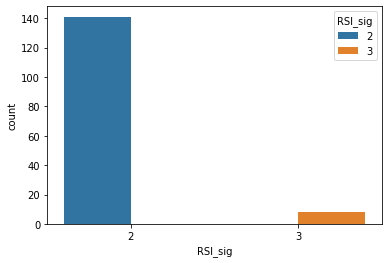

2    141
3      8
Name: RSI_sig, dtype: int64

In [13]:
sns.countplot(x = 'RSI_sig', data=pd.DataFrame(Indicator), hue='RSI_sig')#plots frequency of signals
plt.savefig("shop_rsicount")
plt.show()
Indicator['RSI_sig'].value_counts() #counts according to signal code 

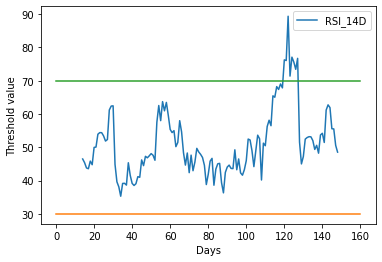

In [14]:
#graphical representation of RSI
r = Indicator['RSI_14D']
h = [0,160]
b = [30,30]
f = plt.plot(r, label = 'RSI_14D')
e = [70,70]
g = plt.plot(h,b,h,e) + f
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("shop_rsi")
plt.show(g)

In [15]:
n=21
Indicator['STOK'] = ((Indicator['Close'] - Indicator['Low'].rolling(window=n,center=False).mean()) /
                     (Indicator['High'].rolling(window=n, center=False).max() - 
                      Indicator['Low'].rolling(window=n, center=False).min())) * 100 #D% stochastic
Indicator['STOD'] = Indicator['STOK'].rolling(window = 7, center=False).mean()  #K% stochastic 

In [16]:
m = []
for i in range (len(Indicator)):
    if Indicator['STOK'][i] >= 28 and Indicator['STOK'][i]<=30:#values in this range satisfy a buy condition
        m.append(1) #buy
    elif Indicator['STOK'][i] > 30 and Indicator['STOK'][i] < 70:#values in this range satisfy a hold condition
        m.append(2) #sell    
    elif Indicator['STOK'][i] >= 70:#values in this range satisfy a sell condition
        m.append(3) #sell
    else:
        m.append(2) #hold
Indicator['STO_sig'] = m

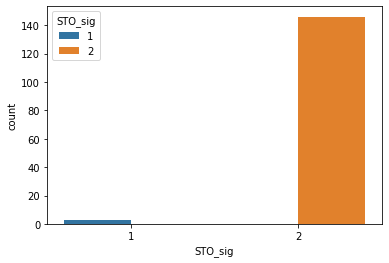

2    146
1      3
Name: STO_sig, dtype: int64

In [17]:
sns.countplot(x = 'STO_sig', data=pd.DataFrame(Indicator), hue='STO_sig')#plots frequency of signals
plt.savefig("shop_stocount")
plt.show()
Indicator['STO_sig'].value_counts()#counts according to signal

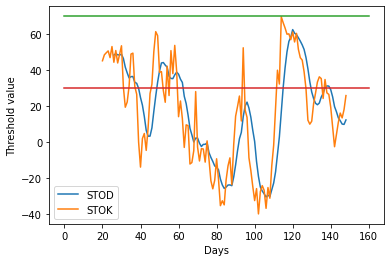

In [18]:
##graphical representation 
t = Indicator['STOD']
j = Indicator['STOK']
u = plt.plot(t, label = 'STOD')
s = plt.plot(j, label = 'STOK')
h = [0,160]
b = [30,30]
e = [70,70]
g = plt.plot(h,e,h,b) + u + s
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("shop_sto")
plt.show()

In [19]:
Indicator['EMA_10'] = Indicator['Close'].ewm(span=10,adjust=False,min_periods=1).mean() #50day exponential ma
Indicator['EMA_30'] = Indicator['Close'].ewm(span=20,adjust=False,min_periods=1).mean() #100day exponential ma
Indicator['EMA_90'] = Indicator['Close'].ewm(span=90,adjust=False,min_periods=1).mean() #200day exponential ma

In [20]:
# append 1 for a buy, 0 for a sell and 2 for hold and NaN
n = []
for i in range (len(Indicator)):
    if Indicator['EMA_10'][i] < Indicator['EMA_30'][i] and Indicator['EMA_90'][i]:#values in this range satisfy a buy condition
        n.append(1) #buy
    elif Indicator['EMA_10'][i] > Indicator['EMA_30'][i] and Indicator['EMA_90'][i]:#values in this range satisfy a hold condition
        n.append(3) #sell
    elif Indicator['EMA_10'][i] == Indicator['EMA_30'][i] == Indicator['EMA_90'][i]:#values in this range satisfy a sell condition
        n.append(2)  #hold      
    else:
        n.append(2)#hold
Indicator['EMA_sig'] = n     

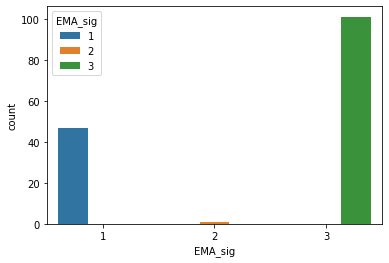

3    101
1     47
2      1
Name: EMA_sig, dtype: int64

In [21]:
sns.countplot(x = 'EMA_sig', data=pd.DataFrame(Indicator), hue='EMA_sig')#plots frequency of signals
plt.savefig("shop_emacount")
plt.show()
Indicator['EMA_sig'].value_counts()#counts according to signal

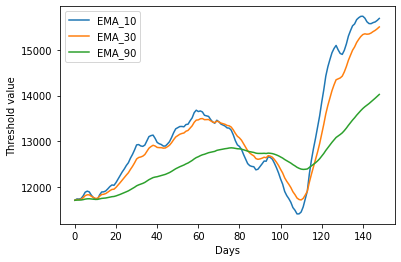

In [22]:
# buy if 10EMA line cuts the other two EMA lines from above and moves below both the EMAs
# sell if 10EMA line cuts the other two EMA lines from below and moves above both the EMAs
a = Indicator['EMA_10'] #10 day exponential moving average
b = Indicator['EMA_30'] #30 day exponential moving average
c = Indicator['EMA_90'] #90 day exponential moving average
d = plt.plot(a, label = 'EMA_10' ) + plt.plot(b, label = 'EMA_30') + plt.plot(c, label = 'EMA_90')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("shop_ema")
plt.show(d)

In [23]:
Indicator['26_ema'] = Indicator['Close'].ewm(span=26,adjust=True,ignore_na=False).mean() #26day ema
Indicator['12_ema'] = Indicator['Close'].ewm(span=12,adjust=True,ignore_na=False).mean() #12day ema
Indicator['MACD'] = Indicator['12_ema'] - Indicator['26_ema'] #macd
Indicator['9EMA_MACD'] = Indicator['MACD'].ewm(span=9,adjust=True,ignore_na=False).mean() #9daymacd_ema
#Indicator

In [24]:
f = []
for i in range (len(Indicator)):
    if Indicator['MACD'][i] > Indicator['9EMA_MACD'][i]:#values in this range satisfy a buy condition
        f.append(1) #buy
    elif Indicator['MACD'][i] < Indicator['9EMA_MACD'][i]:#values in this range satisfy a sell condition
        f.append(3) #sell     
    else:
        f.append(2)#hold
Indicator['MACD_sig'] = f 

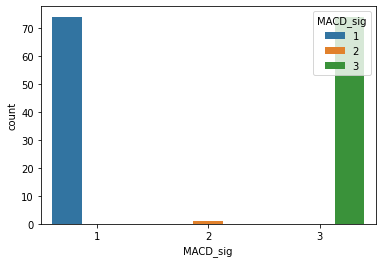

3    74
1    74
2     1
Name: MACD_sig, dtype: int64

In [25]:
sns.countplot(x = 'MACD_sig', data=pd.DataFrame(Indicator), hue='MACD_sig')#plots frequency of signals
plt.savefig("shop_macdcount")
plt.show()
Indicator['MACD_sig'].value_counts()#counts according to signal

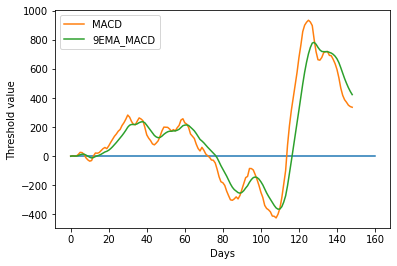

In [26]:
#graphical representation of MACD
q = Indicator['9EMA_MACD']
e = Indicator['MACD']
z = [0,160]
x = [0,0]
r = plt.plot(z,x)+ plt.plot(e, label = 'MACD') +plt.plot(q, label = '9EMA_MACD')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("shop_macd")
plt.show(r)

In [27]:
#Indicator

In [28]:
#from dataframe to array for easy adding
new1 = Indicator['RSI_sig'].to_numpy()
new2 = Indicator['MACD_sig'].to_numpy()
new3 = Indicator['EMA_sig'].to_numpy()
new4 = Indicator['STO_sig'].to_numpy()

In [29]:
b = []
for i in range (len(new2)):
    if new1[i] + new2[i] + new3[i] + new4[i] <= 6: #values in this range satisfy a buy decision
        b.append(1)
    elif new1[i] + new2[i] + new3[i] + new4[i] >=10:#values in this range satisfy a sell decision
        b.append(3)
    else:
        b.append(2)#hold
new5 = pd.Series(b)  
#new5

In [30]:
Indicator['Decision'] = new5
Indicator

,Date,High,Low,Open,Close,Direction,RSI_14D,RSI_sig,STOK,STOD,...,EMA_10,EMA_30,EMA_90,EMA_sig,26_ema,12_ema,MACD,9EMA_MACD,MACD_sig,Decision
0,2020-01-31,11865.0,11691.0,11865.0,11706.0,NaN,NaN,2,NaN,NaN,...,11706.000000,11706.000000,11706.000000,2,11706.000000,11706.000000,0.000000,0.000000,2,2
1,2020-01-30,11885.0,11522.0,11700.0,11865.0,159.0,NaN,2,NaN,NaN,...,11734.909091,11721.142857,11709.494505,3,11788.557692,11792.125000,3.567308,1.981838,1,2
2,2020-01-29,11950.0,11705.0,11950.0,11718.0,-147.0,NaN,2,NaN,NaN,...,11731.834711,11720.843537,11709.681439,3,11763.206999,11763.193995,-0.013003,1.164280,3,3
3,2020-01-28,12125.0,11786.0,12125.0,11800.0,82.0,NaN,2,NaN,NaN,...,11744.228400,11728.382248,11711.666463,3,11773.492714,11774.812213,1.319499,1.216861,1,2
4,2020-01-27,12160.0,11940.0,12160.0,12054.0,254.0,NaN,2,NaN,NaN,...,11800.550509,11759.393463,11719.190277,3,11838.543511,11850.666537,12.123026,4.461198,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,15738.0,15450.0,15670.0,15564.0,164.0,61.922714,2,11.123861,13.577563,...,15573.777689,15368.697495,13861.346169,3,15170.272716,15558.016492,387.743776,533.259410,3,3
145,2019-07-04,15948.0,15676.0,15750.0,15703.0,139.0,55.571848,2,16.227874,11.977160,...,15597.272654,15400.535829,13901.822077,3,15209.734517,15580.321647,370.587131,500.724954,3,3
146,2019-07-03,15859.0,15593.0,15800.0,15676.0,-27.0,55.522317,2,13.556873,10.115443,...,15611.586717,15426.770512,13940.814998,3,15244.273122,15595.041394,350.768271,470.733618,3,3
147,2019-07-02,16082.0,15537.0,16000.0,15796.0,120.0,50.578381,2,18.197658,9.939380,...,15645.116405,15461.935225,13981.588295,3,15285.142242,15625.958102,340.815860,444.750066,3,3


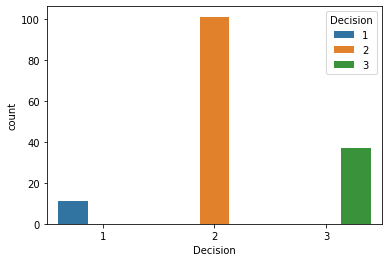

2    101
3     37
1     11
Name: Decision, dtype: int64

In [31]:
sns.countplot(x = 'Decision', data=pd.DataFrame(Indicator), hue='Decision')#plots frequency of signals
plt.savefig("shop_dec")
plt.show()
Indicator['Decision'].value_counts()#counts according to signal

In [32]:
Indicator['Decision'].value_counts(normalize=True) * 100 #calculates frequency of signals as a signal

2    67.785235
3    24.832215
1     7.382550
Name: Decision, dtype: float64